In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Datas: 
https://ec.europa.eu/eurostat/web/microdata/statistics-on-income-and-living-conditions

##### Documentation:
https://circabc.europa.eu/faces/jsp/extension/wai/navigation/container.jsp?FormPrincipal:_idcl=FormPrincipal:_id1&FormPrincipal_SUBMIT=1&id=c31bb5ae-2de6-49d3-bdcb-21992b3a2935&javax.faces.ViewState=meuDdJMlFsG5yNkNcejyPL481TffTqBlmAoXxLv4eKPClWnkj%2FIBx85kqWpflSLguyT5ndOI7k0APPg0%2F305IGJeFLWQfTP7dBwL1Bo1Kxt7G7Quw5NsD8LJJe9kdthN%2B%2BdW8EdW%2BAC%2FqwKdG11ap%2Fd0I6k%3D

# 1. Data Import and decide which one to use

## 1.1 Household Data Germany

### 1.1.1 Houshold Register Data

In [7]:
hhd = pd.read_csv("./data/DE_2013d_EUSILC.csv")

In [8]:
hhd.shape

(12703, 17)

In [9]:
hhd.isna().sum()

DB010          0
DB020          0
DB030          0
DB040      12703
DB040_F    12703
DB060      12703
DB060_F    12703
DB062      12703
DB062_F    12703
DB070      12703
DB070_F    12703
DB075      12703
DB075_F    12703
DB090          0
DB090_F    12703
DB100      12703
DB100_F    12703
dtype: int64

In [10]:
## conlusion: no additional information to the next dataset

### 1.1.2 Houshold Survey Data

In [11]:
hhh = pd.read_csv("./data/DE_2013h_EUSILC.csv")

In [12]:
hhh.shape

(12703, 216)

In [13]:
## Drop columns with more than 20% nans
hhh=hhh.dropna(thresh=len(hhh)*0.8, axis=1)
hhh.shape

(12703, 49)

In [14]:
hhh.columns

Index(['HB010', 'HB020', 'HB030', 'HB050', 'HB060', 'HB100', 'HY010', 'HY020',
       'HY022', 'HY023', 'HY040G', 'HY050G', 'HY060G', 'HY070G', 'HY080G',
       'HY081G', 'HY090G', 'HY100G', 'HY110G', 'HY120G', 'HY130G', 'HY131G',
       'HY140G', 'HY170G', 'HS021', 'HS040', 'HS050', 'HS060', 'HS070',
       'HS080', 'HS090', 'HS100', 'HS110', 'HS120', 'HS130', 'HS140', 'HS160',
       'HS170', 'HS180', 'HS190', 'HH010', 'HH021', 'HH030', 'HH040', 'HH050',
       'HH070', 'HH081', 'HH091', 'HD080'],
      dtype='object')

In [15]:
## dictionary based on
columnnames = {
"HB010": "HB010: YEAR OF THE SURVEY", 
"HB020": "HB020: COUNTRY", 
"HB030": "HB030: HOUSEHOLD ID", 
"HB050": "HB050: MONTH OF HOUSEHOLD INTERVIEW",
"HB060": "HB060: YEAR OF HOUSEHOLD INTERVIEW",
"HB100": "HB100: NUMBER OF MINUTES TO COMPLETE THE HOUSEHOLD QUESTIONNAIRE", 
"HH010": "HH010: DWELLING TYPE",
"HH021": "HH021: TENURE STATUS",
"HH030": "HH030: NUMBER OF ROOMS AVAILABLE TO THE HOUSEHOLD", 
"HH031": "HH031: YEAR OF CONTRACT OR PURCHASING OR INSTALLATION",
"HH040": "HH040: LEAKING ROOF, DAMP WALLS/FLOORS/FOUNDATION, OR ROT IN WINDOW FRAMES OR FLOOR", 
"HH050": "HH050: BILITY TO KEEP HOME ADEQUATELY WARM",
"HH060": "HH060: CURRENT RENT RELATED TO OCCUPIED DWELLING", 
"HH061": "HH061: SUBJECTIVE RENT", 
"HH070": "HH070: TOTAL HOUSING COST",
"HH071": "HH071: MORTGAGE PRINCIPAL REPAYMENT",
"HH081": "HH081: BATH OR SHOWER IN DWELLING",
"HH091": "HH091: INDOOR FLUSHING TOILET FOR SOLE USE OF HOUSEHOLD",
"HS011": "HS011: ARREARS ON MORTGAGE OR RENT PAYMENTS",
"HS021": "HS021: ARREARS ON UTILITY BILLS",
"HS031": "HS031: ARREARS ON HIRE PURCHASE INSTALMENTS OR OTHER LOAN PAYMENTS",
"HS040": "HS040: CAPACITY TO AFFORD PAYING FOR ONE WEEK ANNUAL HOLIDAY AWAY FROM HOME",
"HS050": "HS050: CAPACITY TO AFFORD A MEAL WITH MEAT, CHICKEN, FISH (OR VEGETARIAN EQUIVALENT) EVERY SECOND DAY" ,
"HS060": "HS060: CAPACITY TO FACE UNEXPECTED FINANCIAL EXPENSES",
"HS070": "HS070: DO YOU HAVE A TELEPHONE (INCLUDING MOBILE PHONE)",
"HS080": "HS080: DO YOU HAVE A COLOUR TV", 
"HS090": "HS090: DO YOU HAVE A COMPUTER",
"HS100": "HS100: DO YOU HAVE A WASHING MACHINE",
"HS110": "HS110: DO YOU HAVE A CAR", 
"HS120": "HS120: ABILITY TO MAKE ENDS MEET",
"HS130": "HS130: LOWEST MONTHLY INCOME TO MAKE ENDS MEET",
"HS140": "HS140: FINANCIAL BURDEN OF THE TOTAL HOUSING COST",
"HS150": "HS150: FINANCIAL BURDEN OF THE REPAYMENT OF DEBTS FROM HIRE PURCHASES OR LOANS",
"HS160": "HS160: PROBLEMS WITH THE DWELLING: TOO DARK, NOT ENOUGH LIGHT",
"HS170": "HS170: NOISE FROM NEIGHBOURS OR FROM THE STREET",
"HS180": "HS180: POLLUTION, GRIME OR OTHER ENVIRONMENTAL PROBLEMS",
"HS190": "HS190: CRIME VIOLENCE OR VANDALISM IN THE AREA",
"HY010": "HY010: TOTAL HOUSEHOLD GROSS INCOME",
"HY020": "HY020: TOTAL DISPOSABLE HOUSEHOLD INCOME" ,
"HY022": "HY022: TOTAL DISPOSABLE HOUSEHOLD INCOME BEFORE SOCIAL TRANSFERS OTHER THAN OLD-AGE AND SURVIVOR'S BENEFITS", 
"HY023": "HY023: TOTAL DISPOSABLE HOUSEHOLD INCOME BEFORE SOCIAL TRANSFERS INCLUDING OLD-AGE AND SURVIVOR'S BENEFITS", 
"HY025": "HY025: WITHIN-HOUSEHOLD NON-RESPONSE INFLATION FACTOR", 
"HY030G": "HY030G: IMPUTED RENT",
"HY040G": "HY040G: INCOME FROM RENTAL OF A PROPERTY OR LAND",
"HY090G": "HY090G: INTEREST, DIVIDENDS, PROFIT FROM CAPITAL INVESTMENTS IN UNINCORPORATED BUSINESS",
"HY050G": "HY050G: FAMILY/CHILDREN RELATED ALLOWANCES",
"HY060G": "HY060G: SOCIAL EXCLUSION NOT ELSEWHERE CLASSIFIED",
"HY070G": "HY070G: HOUSING ALLOWANCES",
"HY080G": "HY080G: REGULAR INTER-HOUSEHOLD CASH TRANSFER RECEIVED", 
"HY081G": "HY081G: ALIMONIES RECEIVED (COMPULSORY + VOLUNTARY)",
"HY100G": "HY100G: INTEREST REPAYMENTS ON MORTGAGE",
"HY110G": "HY110G: INCOME RECEIVED BY PEOPLE AGED UNDER", 
"HY120G": "HY120G: REGULAR TAXES ON WEALTH",
"HY130G": "HY130G: REGULAR INTER-HOUSEHOLD CASH TRANSFER PAID",
"HY131G": "HY131G: ALIMONIES PAID (COMPULSORY + VOLUNTARY)",
"HY140G": "HY140G: TAX ON INCOME AND SOCIAL CONTRIBUTIONS", 
"HY145N": "HY145N: REPAYMENTS/RECEIPTS FOR TAX ADJUSTMENT",
"HY170G": "HY170G: VALUE OF GOODS PRODUCED FOR OWN CONSUMPTION",
}

In [16]:
hhh = hhh.rename(columns=columnnames)
hhh.columns

Index(['HB010: YEAR OF THE SURVEY', 'HB020: COUNTRY', 'HB030: HOUSEHOLD ID',
       'HB050: MONTH OF HOUSEHOLD INTERVIEW',
       'HB060: YEAR OF HOUSEHOLD INTERVIEW',
       'HB100: NUMBER OF MINUTES TO COMPLETE THE HOUSEHOLD QUESTIONNAIRE',
       'HY010: TOTAL HOUSEHOLD GROSS INCOME',
       'HY020: TOTAL DISPOSABLE HOUSEHOLD INCOME',
       'HY022: TOTAL DISPOSABLE HOUSEHOLD INCOME BEFORE SOCIAL TRANSFERS OTHER THAN OLD-AGE AND SURVIVOR'S BENEFITS',
       'HY023: TOTAL DISPOSABLE HOUSEHOLD INCOME BEFORE SOCIAL TRANSFERS INCLUDING OLD-AGE AND SURVIVOR'S BENEFITS',
       'HY040G: INCOME FROM RENTAL OF A PROPERTY OR LAND',
       'HY050G: FAMILY/CHILDREN RELATED ALLOWANCES',
       'HY060G: SOCIAL EXCLUSION NOT ELSEWHERE CLASSIFIED',
       'HY070G: HOUSING ALLOWANCES',
       'HY080G: REGULAR INTER-HOUSEHOLD CASH TRANSFER RECEIVED',
       'HY081G: ALIMONIES RECEIVED (COMPULSORY + VOLUNTARY)',
       'HY090G: INTEREST, DIVIDENDS, PROFIT FROM CAPITAL INVESTMENTS IN UNINCORPORATED BU

## 1.2 Personal Data

### 1.2.1 Personal Register Data

In [17]:
ppr = pd.read_csv("./data/DE_2013r_EUSILC.csv")

In [18]:
ppr.shape

(25796, 52)

In [19]:
ppr.isna().sum()

RB010          0
RB020          0
RB030          0
RB031      25796
RB031_F    25796
RB050          0
RB050_F    25796
RB070      25796
RB070_F    25796
RB080          0
RB080_F    25796
RB090          0
RB090_F    25796
RB200          0
RB200_F    25796
RB210          0
RB210_F    25796
RB220      25796
RB220_F    25796
RB230      25796
RB230_F    25796
RB240      25796
RB240_F    25796
RB245      25796
RB245_F    25796
RB250       3789
RB250_F    25796
RB260       4056
RB260_F    25796
RB270      25796
RB270_F    25796
RL010      24396
RL010_F    25796
RL020      24405
RL020_F    25796
RL030      24445
RL030_F    25796
RL040      23088
RL040_F    25796
RL050      23086
RL050_F    25796
RL060      22906
RL060_F    25796
RL070      25796
RL070_F    25796
RX010      25796
RX020      25796
RX030      25796
RX040      25796
RX050      25796
RX060      25796
RX070      25796
dtype: int64

In [20]:
## Drop columns with more than 20% nans
ppr=ppr.dropna(thresh=len(ppr)*0.8, axis=1)
ppr.columns
ppr.shape

(25796, 10)

In [21]:
ppr.isna().sum()

RB010       0
RB020       0
RB030       0
RB050       0
RB080       0
RB090       0
RB200       0
RB210       0
RB250    3789
RB260    4056
dtype: int64

In [22]:
columnnames ={
'RB010': "RB010: YEAR OF THE SURVEY", 
'RB020': "RB020: COUNTRY", 
'RB030': "RB030: PERSONAL ID", 
'RB050': "RB050: PERSONAL CROSS_SECTIONAL WEIGHT", 
'RB080': "RB080: YEAR OF BIRTH", 
'RB090': "RB090: SEX", 
'RB200': "RB200: RESIDENTIAL STATUS", 
'RB210': "RB210: BASIC ACTIVITY STATUS", 
'RB250': "RB250: DATA STATUS",
'RB260': "RB260: TYPE OF INTERVIEWS"}

In [23]:
ppr = ppr.rename(columns=columnnames)
ppr.columns

Index(['RB010: YEAR OF THE SURVEY', 'RB020: COUNTRY', 'RB030: PERSONAL ID',
       'RB050: PERSONAL CROSS_SECTIONAL WEIGHT', 'RB080: YEAR OF BIRTH',
       'RB090: SEX', 'RB200: RESIDENTIAL STATUS',
       'RB210: BASIC ACTIVITY STATUS', 'RB250: DATA STATUS',
       'RB260: TYPE OF INTERVIEWS'],
      dtype='object')

### 1.2.2 Personal Survey Data

In [24]:
ppp = pd.read_csv("./data/DE_2013p_EUSILC.csv")

In [25]:
ppp.isna().sum()

PB010          0
PB020          0
PB030          0
PB040          0
PB040_F    22042
           ...  
PX020      22042
PX030      22042
PX040      22042
PX050      22042
PX200      22042
Length: 284, dtype: int64

In [26]:
## Drop columns with more than 20% nans
ppp=ppp.dropna(thresh=len(ppp)*0.8, axis=1)
ppp.shape

(22042, 64)

In [27]:
ppp.columns

Index(['PB010', 'PB020', 'PB030', 'PB040', 'PB100', 'PB110', 'PB120', 'PB140',
       'PB150', 'PB190', 'PB200', 'PB220A', 'PE010', 'PE040', 'PL031', 'PL035',
       'PL040', 'PL051', 'PL140', 'PL150', 'PL190', 'PH010', 'PH020', 'PH030',
       'PH040', 'PH060', 'PY010G', 'PY020G', 'PY021G', 'PY035G', 'PY050G',
       'PY080G', 'PY090G', 'PY100G', 'PY110G', 'PY120G', 'PY130G', 'PY140G',
       'PD020', 'PD030', 'PD050', 'PD060', 'PD070', 'PD080', 'PW010', 'PW020',
       'PW030', 'PW040', 'PW050', 'PW060', 'PW070', 'PW080', 'PW090', 'PW120',
       'PW130', 'PW140', 'PW150', 'PW160', 'PW170', 'PW180', 'PW190', 'PW200',
       'PW210', 'PW220'],
      dtype='object')

In [28]:
columnnames = {
"PB010": "PB010: YEAR OF THE SURVEY", 
"PB020": "PB020: COUNTRY",
"PB030": "PB030: PERSONAL ID",
"PB040": "PB040: PERSONAL CROSS-SECTIONAL WEIGHT",
"PB050": "PB050: PERSONAL BASE WEIGHT",
"PB060": "PB060: PERSONAL CROSS-SECTIONAL WEIGHT FOR SELECTED RESPONDENT",
"PB070": "PB070: PERSONAL DESIGN WEIGHT FOR SELECTED RESPONDENT",
"PB080": "PB080: PERSONAL BASE WEIGHT FOR SELECTED RESPONDENT",
"PB090": "PB090: DAY OF THE PERSONAL INTERVIEW", 
"PB100": "PB100: MONTH OF THE PERSONAL INTERVIEW", 
"PB110": "PB110: YEAR OF THE PERSONAL INTERVIEW",
"PB120": "PB120: MINUTES TO COMPLETE THE PERSONAL QUESTIONNAIRE",
"PB130": "PB130: MONTH OF BIRTH",
"PB140": "PB140: YEAR OF BIRTH",
"PB150": "PB150: SEX",
"PB160": "PB160: FATHER ID",
"PB170": "PB170: MOTHER",
"PB180": "PB180: SPOUSE/PARTNER ID",
"PB190": "PB190: MARITAL STATUS",
"PB200": "PB200: CONSENSUAL UNION",
"PB210": "PB210: COUNTRY OF BIRTH",
"PB220A": "PB220A: CITIZENSHIP",
"PB220B": "PB220B: CITIZENSHIP",
"PE010": "PE010: CURRENT EDUCATION ACTIVITY",
"PE020": "PE020: ISCED LEVEL CURRENTLY ATTENDED",
"PE030": "PE030: YEAR WHEN HIGHEST LEVEL OF EDUCATION WAS ATTAINED",
"PE040": "PE040: HIGHEST ISCED LEVEL ATTAINED",
"PH010": "PH010: GENERAL HEALTH",
"PH020": "PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION",
"PH030": "PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS",
"PH040": "PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT", 
"PH050": "PH050: MAIN REASON FOR UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT",
"PH060": "PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT",
"PH070": "PH070: MAIN REASON FOR UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT",
"PL015": "PL015: PERSON HAS EVER WORKED",
"PL020": "PL020: ACTIVELY LOOKING FOR A JOB",
"PL025": "PL025: AVAILABLE FOR WORK",
"PL031": "PL031: SELF-DEFINED CURRENT ECONOMIC STATUS",
"PL035": "PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK",
"PL040": "PL040: STATUS IN EMPLOYMENT",
"PL051": "PL051: OCCUPATION (ISCO-08 (COM))",
"PL060": "PL060: NUMBER OF HOURS USUALLY WORKED PER WEEK IN MAIN JOB",
"PL073": "PL073: NUMBER OF MONTHS SPENT AT FULL-TIME WORK AS EMPLOYEE",
"PL074": "PL074: NUMBER OF MONTHS SPENT AT PART-TIME WORK AS EMPLOYEE",
"PL075": "PL075: NUMBER OF MONTHS SPENT AT FULL-TIME WORK AS SELF-EMPLOYED (INCLUDING FAMILY WORKER)",
"PL076": "PL076: NUMBER OF MONTHS SPENT AT PART-TIME WORK AS SELF-EMPLOYED (INCLUDING FAMILY WORKER)",
"PL080": "PL080: NUMBER OF MONTHS SPENT IN UNEMPLOYMENT",
"PL085": "PL085: NUMBER OF MONTHS SPENT IN RETIREMENT OR EARLY RETIREMENT",
"PL086": "PL086: NUMBER OF MONTHS SPENT AS DISABLED OR/AND UNFIT TO WORK",
"PL087": "PL087: NUMBER OF MONTHS SPENT STUDYING",
"PL088": "PL088: NUMBER OF MONTHS SPENT IN COMPULSORY MILITARY SERVICE",
"PL089": "PL089: NUMBER OF MONTHS SPENT FULFILLING DOMESTIC TASKS AND CARE RESPONSIBILITIES",
"PL090": "PL090: NUMBER OF MONTHS SPENT IN OTHER INACTIVITY",
"PL100": "PL100: TOTAL NUMBER OF HOURS USUALLY WORKED IN SECOND, THIRD… JOBS",
"PL101": "PL111: NACE REV",
"PL120": "PL120: REASON FOR WORKING LESS THAN 30 HOURS",
"PL130": "PL130: NUMBER OF PERSONS WORKING AT THE LOCAL UNIT",
"PL140": "PL140: TYPE OF CONTRACT",
"PL150": "PL150: MANAGERIAL POSITION", 
"PL160": "PL160: CHANGE OF JOB SINCE LAST YEAR", 
"PL170": "PL170: REASON FOR CHANGE",
"PL180": "PL180: MOST RECENT CHANGE IN THE INDIVIDUAL’S ACTIVITY STATUS",
"PL190": "PL190: WHEN BEGAN FIRST REGULAR JOB",
"PL200": "PL200: NUMBER OF YEARS SPENT IN PAID WORK", 
"PY010G": "PY010G: EMPLOYEE CASH OR NEAR CASH INCOME",
"PY020G": "PY020G: NON-CASH EMPLOYEE INCOME",
"PY021G": "PY021G: COMPANY CAR",
"PY030G": "PY030G: EMPLOYER'S SOCIAL INSURANCE CONTRIBUTION",
"PY031G": "PY031G: OPTIONAL EMPLOYER'S SOCIAL INSURANCE CONTRIBUTIONS",
"PY035G": "PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS", 
"PY050G": "PY050G: CASH BENEFITS OR LOSSES FROM SELF-EMPLOYMENT",
"PY080G": "PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS",
"PY090G": "PY090G: UNEMPLOYMENT BENEFITS", 
"PY100G": "PY100G: OLD-AGE BENEFITS", 
"PY110G": "PY110G: SURVIVOR’ BENEFITS", 
"PY120G": "PY120G: SICKNESS BENEFITS", 
"PY130G": "PY130G: DISABILITY BENEFITS",
"PY140G": "PY140G: EDUCATION-RELATED ALLOWANCES", 
"PY200G": "PY200G: GROSS MONTHLY EARNINGS FOR EMPLOYEES", 
"PW010": "PW010: OVERALL LIFE SATISFACTION", 
"PW020": "PW020: MEANING OF LIFE", 
"PW030": "PW030: SATISFACTION WITH FINANCIAL SITUATION", 
"PW040": "PW040: SATISFACTION WITH ACCOMMODATION",
"PW050": "PW050: BEING VERY NERVOUS", 
"PW060": "PW060: FEELING DOWN IN THE DUMPS",
"PW070": "PW070: FEELING CALM AND PEACEFUL", 
"PW080": "PW080: FEELING DOWNHEARTED OR DEPRESSED",
"PW090": "PW090: BEING HAPPY",
"PW100": "PW100: JOB SATISFACTION",
"PW110": "PW110: SATISFACTION WITH COMMUTING TIME",
"PW120": "PW120: SATISFACTION WITH TIME USE",
"PW130": "PW130: TRUST IN THE POLITICAL SYSTEM",
"PW140": "PW140: TRUST IN THE LEGAL SYSTEM",
"PW150": "PW150: TRUST IN THE POLICE",
"PW160": "PW160: SATISFACTION WITH PERSONAL RELATIONSHIPS",
"PW170": "PW170: PERSONAL MATTERS (ANYONE TO DISCUSS WITH)", 
"PW180": "PW180: HELP FROM OTHERS",
"PW190": "PW190: TRUST IN OTHERS",
"PW200": "PW200: SATISFACTION WITH RECREATIONAL OR GREEN AREAS",
"PW210": "PW210: SATISFACTION WITH LIVING ENVIRONMENT", 
"PW220": "PW220: PHYSICAL SECURITY",
'PD020': "PD020: Replace worn-out clothes by some new (not second-hand) ones" , 
'PD030': "PD030: Two pairs of properly fitting shoes", 
'PD050': "PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month", 
'PD060': "PD060: Regularly participate in a leisure activity", 
'PD070': "PD070: Spend a small amount of money each week on yourself",
'PD080': "PD080: Internet connection for personal use at home"
}

###PD:  ADDITIONAL VARIABLES FOR MATERIAL DEPRIVATION

In [29]:
ppp = ppp.rename(columns=columnnames)
ppp.columns

Index(['PB010: YEAR OF THE SURVEY', 'PB020: COUNTRY', 'PB030: PERSONAL ID',
       'PB040: PERSONAL CROSS-SECTIONAL WEIGHT',
       'PB100: MONTH OF THE PERSONAL INTERVIEW',
       'PB110: YEAR OF THE PERSONAL INTERVIEW',
       'PB120: MINUTES TO COMPLETE THE PERSONAL QUESTIONNAIRE',
       'PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PE040: HIGHEST ISCED LEVEL ATTAINED',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL040: STATUS IN EMPLOYMENT', 'PL051: OCCUPATION (ISCO-08 (COM))',
       'PL140: TYPE OF CONTRACT', 'PL150: MANAGERIAL POSITION',
       'PL190: WHEN BEGAN FIRST REGULAR JOB', 'PH010: GENERAL HEALTH',
       'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
       'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNME

In [30]:
### drop columns because not interested

columnstodrop=['PB040: PERSONAL CROSS-SECTIONAL WEIGHT', 'PB100: MONTH OF THE PERSONAL INTERVIEW',
               'PB110: YEAR OF THE PERSONAL INTERVIEW','PB120: MINUTES TO COMPLETE THE PERSONAL QUESTIONNAIRE']

ppp.drop(columnstodrop, axis=1, inplace=True)

In [31]:
ppp.columns

Index(['PB010: YEAR OF THE SURVEY', 'PB020: COUNTRY', 'PB030: PERSONAL ID',
       'PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PE040: HIGHEST ISCED LEVEL ATTAINED',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL040: STATUS IN EMPLOYMENT', 'PL051: OCCUPATION (ISCO-08 (COM))',
       'PL140: TYPE OF CONTRACT', 'PL150: MANAGERIAL POSITION',
       'PL190: WHEN BEGAN FIRST REGULAR JOB', 'PH010: GENERAL HEALTH',
       'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
       'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PY010G: EMPLOYEE CASH OR NEAR CASH INCOME',
       'PY020G: NON-CASH EMPLOYEE INCOME', 'PY02

## 1.3 Conclusion

I focus on the personal survey data, because it has the most observations and the most interesting datas.

# 2. Check column per column

## 2.1 Backtround (PB) - Columns

In [32]:
# ['PB010: YEAR OF THE SURVEY']
ppp['PB010: YEAR OF THE SURVEY'].describe()
### --> 1 unique value (2013); ok, keep at the moment, in case i add another year

count    22042.0
mean      2013.0
std          0.0
min       2013.0
25%       2013.0
50%       2013.0
75%       2013.0
max       2013.0
Name: PB010: YEAR OF THE SURVEY, dtype: float64

In [33]:
# ['PB020: COUNTRY']
ppp['PB020: COUNTRY'].unique()
### --> 1 unique value (DE); ok, keep at the moment, in case i add another country

array(['DE'], dtype=object)

dtype('int64')

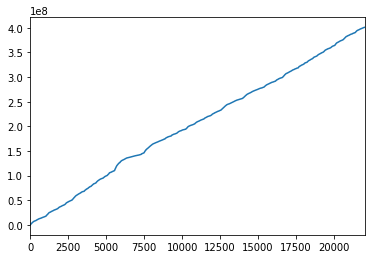

In [34]:
# ['PB030: PERSONAL ID']
# values should be unique
ppp = ppp.drop_duplicates(subset="PB030: PERSONAL ID")
ppp.shape
# no duplicates

ppp["PB030: PERSONAL ID"].plot.line()

ppp["PB030: PERSONAL ID"].dtype

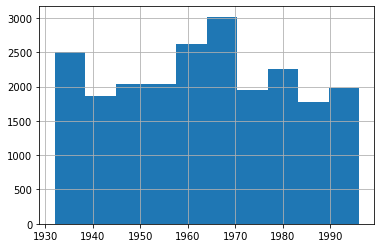

In [35]:
## ["PB140: YEAR OF BIRTH"]
ppp["PB140: YEAR OF BIRTH"].dtype

ppp["PB140: YEAR OF BIRTH"].describe()
ppp["PB140: YEAR OF BIRTH"].hist()
## ok

In [36]:
## ['PB150: SEX']
ppp['PB150: SEX'].unique

"""
1 Male 
2 Female 
 1 filled 
-1 missing
"""
ppp['PB150: SEX'].value_counts(normalize=True)

## more or less balanced, no missing values

## standardize to international coding: 0 for female and 1 for male
#ppp['PB150: SEX'] = ppp['PB150: SEX'].apply(lambda x: 0 if x==2 else 1)


2    0.509845
1    0.490155
Name: PB150: SEX, dtype: float64

In [37]:
## ['PB190: MARITAL STATUS']

ppp['PB190: MARITAL STATUS'].unique()

"""
1 Never married 
2 Married 
3 Separated 
4 Widowed 
5 Divorced 

-1 missing 
"""
ppp['PB190: MARITAL STATUS'].value_counts()

ppp['PB190: MARITAL STATUS'].isna().sum()

# drop rows?

ppp[ppp['PB190: MARITAL STATUS'].isna()].isna().sum()/ ppp.isna().sum()
## because the one missint martial status have also other nans, i ll drop 
ppp['PB190: MARITAL STATUS'].dropna(inplace=True)

<font color='red'>check later, if dropping was a good idea-</font>


In [38]:
### [PB200: CONSENSUAL UNION']

"""
Consensual union refers to the situation when two persons belong to the same household, and have a ‘marriage-like’ relationship with each other, and are not married to or in a registered partnership with each other.

1 yes, on a legal basis
2 yes, without a legal basis
3 no 
"""
ppp['PB200: CONSENSUAL UNION'].unique()


### difference to martital status
pd.crosstab(ppp['PB190: MARITAL STATUS'], ppp['PB200: CONSENSUAL UNION'],normalize='index').apply(lambda x: round(x,2))
## not one to one related to martial status... (because equal distributed) --> keep column

ppp['PB200: CONSENSUAL UNION'].value_counts()
ppp['PB200: CONSENSUAL UNION'].isna().sum()


0

In [39]:
## ['PB220A: CITIZENSHIP']

"""
Citizenship is defined as the particular legal bond between the individual and his/her State 
acquired by birth or naturalisation, whether by declaration, choice, option, marriage or other 
means according to the national legislation. It generally corresponds to the country issuing the 
passport. 
LOC: Local?
OTH: other
"""

ppp['PB220A: CITIZENSHIP'].unique()

ppp['PB220A: CITIZENSHIP'].isna().sum()

# drop rows? depends, if important information... a lot of other?
ppp['PB220A: CITIZENSHIP'].value_counts(normalize=True).apply(lambda x: round(x,2))

### two options. drop column or drop nan....

#ppp['PB190: MARITAL STATUS'].dropna(inplace=True)

LOC    0.97
OTH    0.03
Name: PB220A: CITIZENSHIP, dtype: float64

<font color='red'>check later, which one to drop!</font>

## 2.2 Education (PE) - Columns

In [40]:
## 'PE010: CURRENT EDUCATION ACTIVITY'

"""
The concept is whether the person is currently participating in an educational program. 
1 in education 
2 not in education 
"""

ppp['PE010: CURRENT EDUCATION ACTIVITY'].value_counts()

## all good

2    19605
1     2437
Name: PE010: CURRENT EDUCATION ACTIVITY, dtype: int64

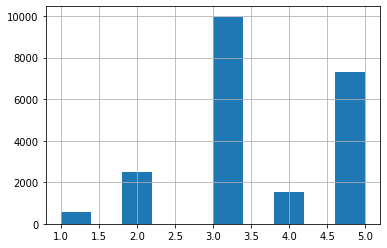

In [41]:
## 'PE040: HIGHEST ISCED LEVEL ATTAINED'

"""
Educational attainment of a person is the highest level of an educational programme the 
person has successfully completed and the study field of this programme0 pre-primary education.
1 primary education 
2 lower secondary education 
3 (upper) secondary education 
4 post-secondary non tertiary education 
5 first stage of tertiary education (not leading directly to an advanced research 
qualification) 
6 second stage of tertiary education (leading to an advanced research 
qualification)
"""

ppp['PE040: HIGHEST ISCED LEVEL ATTAINED'].value_counts()
ppp['PE040: HIGHEST ISCED LEVEL ATTAINED'].isna().sum()

#173 missings 

ppp['PE040: HIGHEST ISCED LEVEL ATTAINED'].hist()

<font color='red'>check later, which one to drop!</font>

## 2.3 Labour (PL) - Columns

PL031: SELF-DEFINED CURRENT ECONOMIC STATUS                158
PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK       0
PL040: STATUS IN EMPLOYMENT                               1630
PL051: OCCUPATION (ISCO-08 (COM))                         1670
PL140: TYPE OF CONTRACT                                   2835
PL150: MANAGERIAL POSITION                                2783
PL190: WHEN BEGAN FIRST REGULAR JOB                       1997
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C762E1D88>,
      dtype=object)

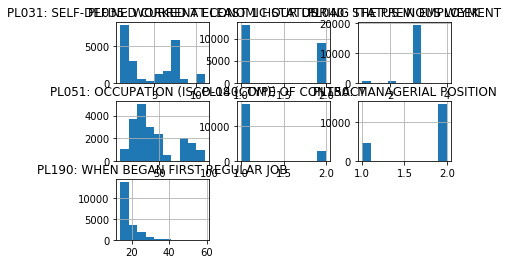

In [42]:
work = ['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS', 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK','PL040: STATUS IN EMPLOYMENT','PL051: OCCUPATION (ISCO-08 (COM))', 'PL140: TYPE OF CONTRACT', 'PL150: MANAGERIAL POSITION', 'PL190: WHEN BEGAN FIRST REGULAR JOB']

print(ppp[work].isna().sum())

ppp[work].hist()

In [43]:
### check if nans are in the same row
null_displ = ppp[ppp['PL140: TYPE OF CONTRACT'].isnull()]
null_displ[work].isna().sum()

### not the same --> look for other solutions to fill na

PL031: SELF-DEFINED CURRENT ECONOMIC STATUS                 61
PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK       0
PL040: STATUS IN EMPLOYMENT                                522
PL051: OCCUPATION (ISCO-08 (COM))                          510
PL140: TYPE OF CONTRACT                                   2835
PL150: MANAGERIAL POSITION                                 678
PL190: WHEN BEGAN FIRST REGULAR JOB                        653
dtype: int64

###### [0]  ['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']

In [44]:

"""
The target variable captures the person’s own perception of their main activity at present.  It 
differs from the ILO concept to the extent that people’s own perception of their main status 
differs from the strict definitions used in the ILO definitions.
1 Employee working full-time 
2 Employee working part-time 
3 Self-employed working full-time (including family worker) 
4 Self-employed working part-time (including family worker) 
5 Unemployed 
6 Pupil, student, further training, unpaid work experience 
7 In retirement or in early retirement or has given up business 
8 Permanently disabled or/and unfit to work 
9 In compulsory military community or service 
10 Fulfilling domestic tasks and care responsibilities 
11 Other inactive person 
"""
ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS'].unique()

## ok

### but delete 158 nan, because this will probably be one of the main features
ppp.dropna(subset=['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS'], inplace = True)



###### [1] 'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK'

In [45]:
"""
A person is considered as working
reference week or if he/she was not working
absent during the reference week. 
1 yes
2 no
"""
ppp['PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK'].value_counts()

ppp['PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK'].isna().sum()

# all good

0

###### [2] 'PL040: STATUS IN EMPLOYMENT'

In [46]:
"""
This variable refers to the main job, namely the current main job for people at work.
1 self-employed with employees 
2 self-employed without employees 
3 employee 
4 family worker 

"""

ppp['PL040: STATUS IN EMPLOYMENT'].value_counts()

ppp['PL040: STATUS IN EMPLOYMENT'].isna().sum()

pd.crosstab( ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS'],ppp['PL040: STATUS IN EMPLOYMENT'].isna())

## attention; similar information as ['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS'] --> colinearity / overfitting
## at the same time a lot of missings  --> unemployed or others? mainly in status 5 (unemployed) 6, 7 10, 11 other non-jobs
## we can fill nan with a 0 for this categories

ppp.loc[(ppp['PL040: STATUS IN EMPLOYMENT'].isna()) & ((ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==5) | (ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==6) | (ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==7) | (ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==8) |(ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==10) |(ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==11)), 'PL040: STATUS IN EMPLOYMENT'] = 0
print(ppp['PL040: STATUS IN EMPLOYMENT'].isna().sum())
pd.crosstab( ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS'],ppp['PL040: STATUS IN EMPLOYMENT'].isna())

ppp[work].isna().sum()

344


PL031: SELF-DEFINED CURRENT ECONOMIC STATUS                  0
PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK       0
PL040: STATUS IN EMPLOYMENT                                344
PL051: OCCUPATION (ISCO-08 (COM))                         1513
PL140: TYPE OF CONTRACT                                   2774
PL150: MANAGERIAL POSITION                                2726
PL190: WHEN BEGAN FIRST REGULAR JOB                       1949
dtype: int64

###### [3] 'PL051: OCCUPATION (ISCO-08 (COM))'

In [47]:
"""
This variable reafers to the main job, namely the current main job for people at work (PL031 = 
1, 2, 3 or 4) or the last main job for people who do not have a job (PL031 not = 1, 2, 3 or 4 
and PL015 = 1). 
Numbers between 
"""
print(ppp['PL051: OCCUPATION (ISCO-08 (COM))'].unique())
## ok, 


## 1670 missings, same problems as with previous variables, unemployed or others? :
pd.crosstab( ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS'],ppp['PL051: OCCUPATION (ISCO-08 (COM))'].isna())
# mainly in status 5 (unemployed) 6, 9, 10, 11 other non-jobs

# fillna with 10 for pl31 5,6,etc.
ppp.loc[(ppp['PL051: OCCUPATION (ISCO-08 (COM))'].isna()) & ((ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==5) | (ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==6) | (ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==7) | (ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==8) |(ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==10) |(ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==11)), 'PL051: OCCUPATION (ISCO-08 (COM))'] =10

## drop the rest of the nans
ppp.dropna(subset=['PL051: OCCUPATION (ISCO-08 (COM))'], inplace = True)

ppp[work].isna().sum()

[52. 62. 23. 51. 44. 31. 24. 32. 42. 81. 22. 41. 73. 93. 72. 33. 61. nan
 94. 96. 71. 43. 25. 91. 13. 92. 74. 21. 75. 34. 26. 83. 11. 12. 14. 54.
 35. 53. 82.]


PL031: SELF-DEFINED CURRENT ECONOMIC STATUS                  0
PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK       0
PL040: STATUS IN EMPLOYMENT                                342
PL051: OCCUPATION (ISCO-08 (COM))                            0
PL140: TYPE OF CONTRACT                                   2770
PL150: MANAGERIAL POSITION                                2718
PL190: WHEN BEGAN FIRST REGULAR JOB                       1940
dtype: int64

[Details in structure08 here:](./data/structure08.docx)

###### [4] 'PL140: TYPE OF CONTRACT', 

In [48]:


"""
'PL140: TYPE OF CONTRACT'
1 permanent job/work contract of unlimited duration 
2 temporary job/work contract of limited duration
This question is addressed only to employees. 

Fillna with 3 : no contract
"""
print(ppp['PL140: TYPE OF CONTRACT'].unique())
## ok, 


## alot of missings, same problems as with previous variables, unemployed or others? :
pd.crosstab( ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS'],ppp['PL140: TYPE OF CONTRACT'].isna(),normalize='index').apply(lambda x: round(x,2))

[ 1. nan  2.]


PL140: TYPE OF CONTRACT,False,True
PL031: SELF-DEFINED CURRENT ECONOMIC STATUS,,
1.0,0.93,0.07
2.0,0.87,0.13
3.0,0.92,0.08
4.0,0.88,0.12
5.0,0.77,0.23
6.0,0.69,0.31
7.0,0.90,0.10
8.0,0.87,0.13
10.0,0.69,0.31


In [49]:
# mainly in status 5 (unemployed) 6, 9, 10, 11 other non-jobs
# fillna with 0 for pl31 5,6,etc.?
ppp.loc[(ppp['PL140: TYPE OF CONTRACT'].isna()) & ((ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==5) | (ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==6) | (ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==7) | (ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==8) |(ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==9) |(ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==10) |(ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==11)), 'PL140: TYPE OF CONTRACT'] =0

pd.crosstab( ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS'],ppp['PL140: TYPE OF CONTRACT'].isna())

ppp[work].isna().sum()
### still a lot of nans...(1000)


PL031: SELF-DEFINED CURRENT ECONOMIC STATUS                  0
PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK       0
PL040: STATUS IN EMPLOYMENT                                342
PL051: OCCUPATION (ISCO-08 (COM))                            0
PL140: TYPE OF CONTRACT                                   1007
PL150: MANAGERIAL POSITION                                2718
PL190: WHEN BEGAN FIRST REGULAR JOB                       1940
dtype: int64

###### [5] 'PL150: MANAGERIAL POSITION'

In [50]:
"""
'PL150: MANAGERIAL POSITION'
1 supervisory : includes formal responsibility for supervising a group of other employees
2 non-supervisory

referst to PL031=1, 2, 3 or 4
"""

print(ppp['PL150: MANAGERIAL POSITION'].unique())
## ok, 

## alot of missings, same problems as with previous variables, unemployed or others? :
pd.crosstab( ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS'],ppp['PL150: MANAGERIAL POSITION'].isna(),normalize='index').apply(lambda x: round(x,2))
# mainly in status 5 (unemployed) 6, 9, 10, 11 other non-jobs
# fillna with 0 for pl31 5,6,etc.?

[ 1.  2. nan]


PL150: MANAGERIAL POSITION,False,True
PL031: SELF-DEFINED CURRENT ECONOMIC STATUS,,
1.0,0.93,0.07
2.0,0.88,0.12
3.0,0.94,0.06
4.0,0.85,0.15
5.0,0.77,0.23
6.0,0.70,0.30
7.0,0.90,0.10
8.0,0.88,0.12
10.0,0.71,0.29


In [51]:
# mainly in status 5 (unemployed) 6, 9, 10, 11 other non-jobs
# fillna with 0 for pl31 5,6,etc.?
ppp.loc[(ppp['PL150: MANAGERIAL POSITION'].isna()) & ((ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==5) | (ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==6) | (ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==7) | (ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==8) |(ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==9) |(ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==10) |(ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS']==11)), 'PL150: MANAGERIAL POSITION'] =0

pd.crosstab( ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS'],ppp['PL150: MANAGERIAL POSITION'].isna())

ppp[work].isna().sum()
### still a lot of nans...(alsmost 1000)

PL031: SELF-DEFINED CURRENT ECONOMIC STATUS                  0
PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK       0
PL040: STATUS IN EMPLOYMENT                                342
PL051: OCCUPATION (ISCO-08 (COM))                            0
PL140: TYPE OF CONTRACT                                   1007
PL150: MANAGERIAL POSITION                                 965
PL190: WHEN BEGAN FIRST REGULAR JOB                       1940
dtype: int64

###### [6]  'PL190: WHEN BEGAN FIRST REGULAR JOB'

C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\haenni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


0.10076896014474544

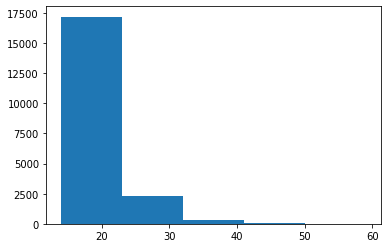

In [52]:
"""
'PL190: WHEN BEGAN FIRST REGULAR JOB'
It is designed to permit the calculation of the total potential time the person could have spent 
in the labour force. It is the age at which the person began their first regular job. 
"""

pd.crosstab(ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS'], ppp['PL190: WHEN BEGAN FIRST REGULAR JOB'].isna(),normalize='index').apply(lambda x: round(x,2))
## conclusion: nans in all pl031 categories, but 

### too many nones, probably highly correlated with "PB140: YEAR OF BIRTH",
ppp['PL190: WHEN BEGAN FIRST REGULAR JOB'].corr(ppp['PB140: YEAR OF BIRTH']) # not at all

plt.hist(ppp['PL190: WHEN BEGAN FIRST REGULAR JOB'], bins=5)

pd.crosstab( ppp['PL031: SELF-DEFINED CURRENT ECONOMIC STATUS'],ppp['PL190: WHEN BEGAN FIRST REGULAR JOB'].isna(),normalize='index').apply(lambda x: round(x,2))

# conclusion: most nans are also with unemployed (5) antd the others, but here i think it doesnt make sense to fill any value
# because we dont know if they had a ob befor beeing unemployed or in a training... 
# also most values are around 20, not big variation 
# drop column 
ppp['PL190: WHEN BEGAN FIRST REGULAR JOB'].mean()
ppp['PL190: WHEN BEGAN FIRST REGULAR JOB'].median()
ppp['PL190: WHEN BEGAN FIRST REGULAR JOB'][ppp['PL190: WHEN BEGAN FIRST REGULAR JOB']>24].count()/ ppp['PL190: WHEN BEGAN FIRST REGULAR JOB'].count()



###### Conlusion - final cleaning

In [53]:
ppp[work].isna().sum()
### still a lot of nans...

PL031: SELF-DEFINED CURRENT ECONOMIC STATUS                  0
PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK       0
PL040: STATUS IN EMPLOYMENT                                342
PL051: OCCUPATION (ISCO-08 (COM))                            0
PL140: TYPE OF CONTRACT                                   1007
PL150: MANAGERIAL POSITION                                 965
PL190: WHEN BEGAN FIRST REGULAR JOB                       1940
dtype: int64

In [54]:
null_displ = ppp[ppp['PL150: MANAGERIAL POSITION'].isnull()==False]
null_displ[work].isna().sum()
### still a lot of nans in the other categories

PL031: SELF-DEFINED CURRENT ECONOMIC STATUS                  0
PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK       0
PL040: STATUS IN EMPLOYMENT                                258
PL051: OCCUPATION (ISCO-08 (COM))                            0
PL140: TYPE OF CONTRACT                                    837
PL150: MANAGERIAL POSITION                                   0
PL190: WHEN BEGAN FIRST REGULAR JOB                       1839
dtype: int64

<font color='red'>check later, what else i want to drop.

Question to Jo
    
 I have a lot of columns:
 - drop columns / test for colinearity --> decide wich columns and then drop nans?
 - drop column with nan?  
 </font>

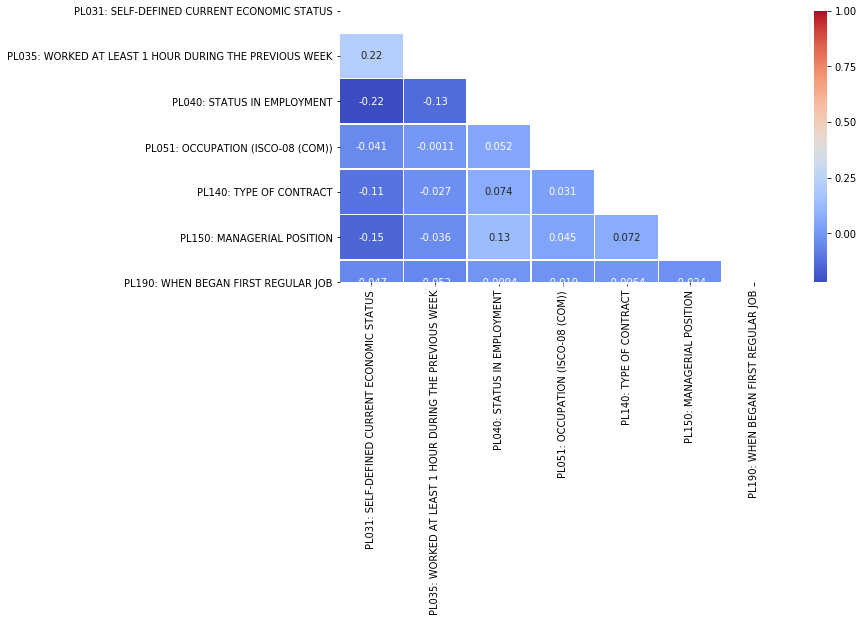

In [307]:
#### 

subwork =ppp[work]

plt.figure(figsize =(10,5))
corr = subwork.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, cmap='coolwarm', annot = True, linewidth=0.5, mask=mask)
## alsmost no correlation

## 2.4 Health (PH) - Columns

In [56]:
### Health
health =['PH010: GENERAL HEALTH',
       'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
       'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT']

In [58]:
ppp[health].isna().sum()
## overall not a lot of missings (especially compared to PL) --> try to keep all the features

PH010: GENERAL HEALTH                                                     28
PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION     47
PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS               208
PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT                     0
PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT                      0
dtype: int64

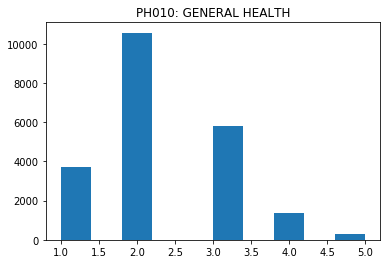

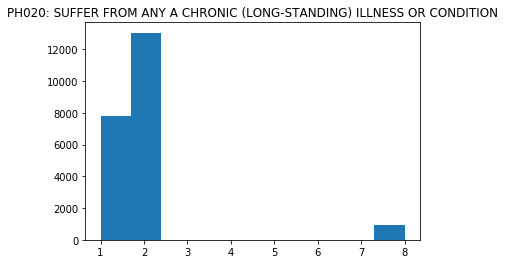

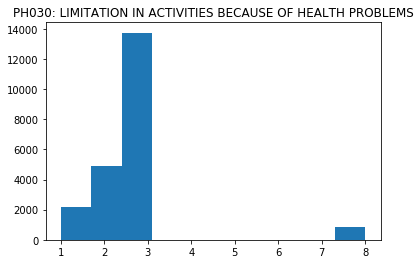

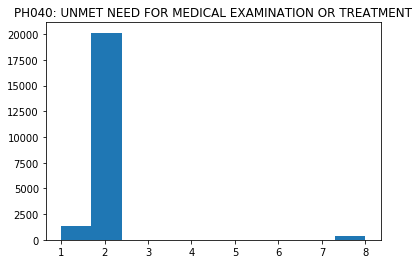

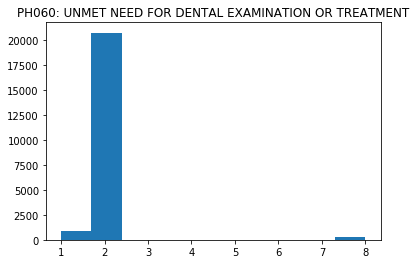

In [78]:
for x in range(len(health)):
    plt.hist(ppp[health[x]])
    plt.title(health[x])
    plt.show()
### strange value 8 for PH20-PH60 --> check


###### [0] PH010: GENERAL HEALTH 

(array([ 3739.,     0., 10579.,     0.,     0.,  5803.,     0.,  1388.,
            0.,   300.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

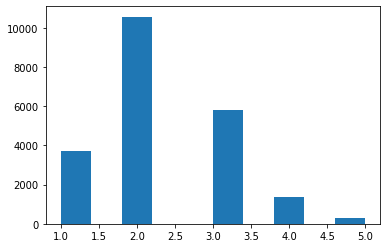

In [79]:
"""
The measurement of self-perceived health (SPH) is, by its very nature, subjective. The notion 
is restricted to an assessment coming from the individual and not from anyone outside that 
individual.
1 very good 
2 good 
3 fair 
4 bad 
5 very bad 

"""

ppp[health[0]].unique() ### values match definition

## drop the nans
ppp.dropna(subset=[health[0]], inplace = True)
ppp[health[0]].isna().sum()

plt.hist(ppp[health[0]]) ## slightly left shifted distribution, but i dont see a problem with that at the momemnts

###### [1] PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION

In [86]:
"""
The main characteristics of a chronic condition are that it is permanent and may be expected 
to require a long period of supervision, observation or care; temporary problems are not of 
interest.
1 yes 
2 no 

8 dont know
9 refusal
"""

ppp[health[1]].unique()
### what is this 8? --> check documentation: dont know
## how many 8?
ppp[health[1]].value_counts()
# 912 --> decide later what to do with them
ppp[health[1]].isna().sum() ## plus 47 nans

47

<font color='red'> Question: what to do with answer "8 dont know"? and can i change nans to dont know?
 </font>

###### [2] PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS  

In [91]:
"""
The person’s self-assessment of whether they are hampered in their usual activity, as 
"activities people usually do", by any ongoing physical or mental health problem, illness or 
disability
1 yes, strongly limited 
2 yes, limited 
3 no, not limited 
"""
ppp[health[2]].unique()
## also has 8...
## how many 8?
ppp[health[2]].value_counts()
# 839 --> do the same as with health [1]
ppp[health[2]].isna().sum() ## plus 207 nans


207

###### [3] PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT 

In [94]:
"""
1 yes, there was at least one occasion when the person really needed examination 
or treatment but did not 
2 no, there was no occasion when the person really needed examination or 
treatment but did not 
"""
ppp[health[3]].value_counts()
## also has 8...
# 355 --> do the same as with health
# probably problem of imbalanced answers!!


0

###### [4] PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT 

In [98]:
"""
1 yes, there was at least one occasion when the person really needed dental 
examination or treatment but did not 
2 no, there was no occasion when the person really needed dental examination or 
treatment but did not 
"""
ppp[health[4]].value_counts()
## also has 8...
# 236 --> do the same as with health
# even more likely a problem of imbalancing!!
# no nans

0

###### Conclusion

In [ ]:
ppp[health].isna().sum()

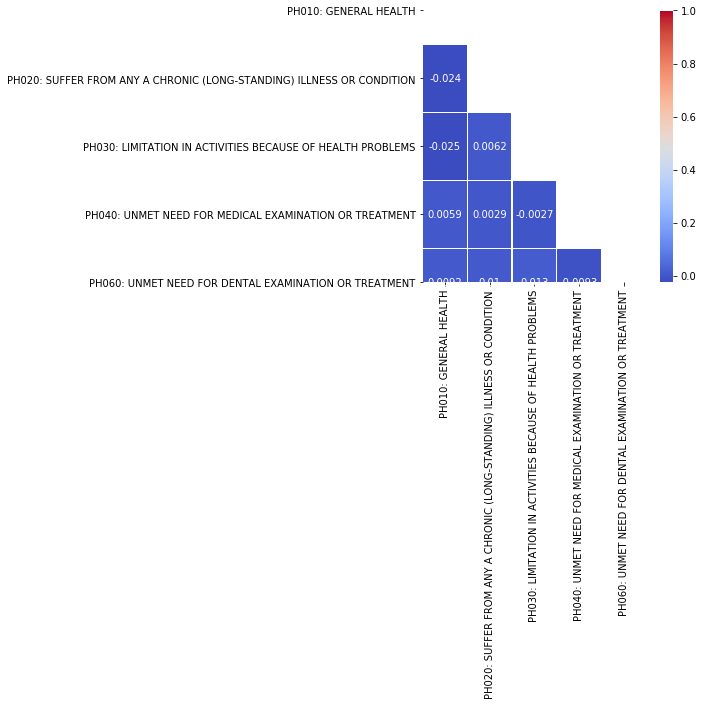

In [304]:
subhealth =ppp[health]

plt.figure(figsize =(5,5))
corr = subhealth.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, cmap='coolwarm', annot = True, linewidth=0.5, mask=mask)
## alsmost no correlation

##### <font color='red'> Question: what to do with answer "8 dont know"? and can i change nans to dont know?
 </font>

## 2.5 Job Stuff (PY) - Columns

In [ ]:
### job stuff
job = ['PY010G: EMPLOYEE CASH OR NEAR CASH INCOME',
       'PY020G: NON-CASH EMPLOYEE INCOME', 'PY021G: COMPANY CAR',
       'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
       'PY050G: CASH BENEFITS OR LOSSES FROM SELF-EMPLOYMENT',
       'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
       'PY090G: UNEMPLOYMENT BENEFITS', 'PY100G: OLD-AGE BENEFITS',
       'PY110G: SURVIVOR’ BENEFITS', 'PY120G: SICKNESS BENEFITS',
       'PY130G: DISABILITY BENEFITS', 'PY140G: EDUCATION-RELATED ALLOWANCES']
ppp[job].isna().sum()
## no nan - jeah!!

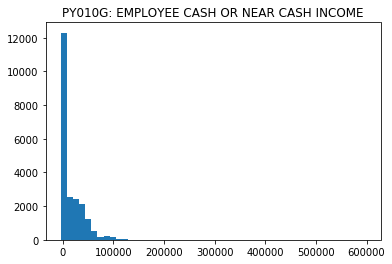

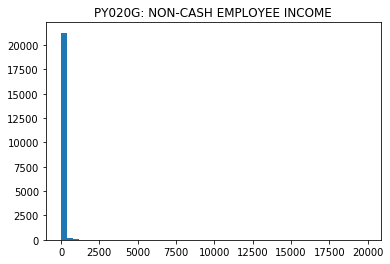

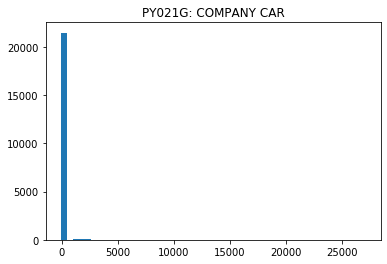

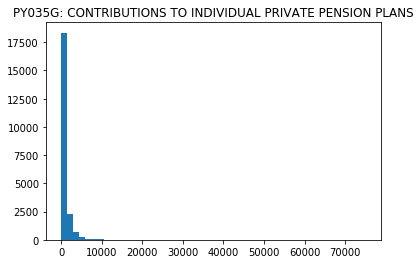

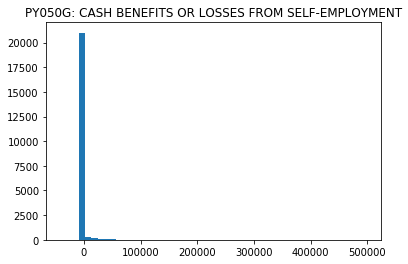

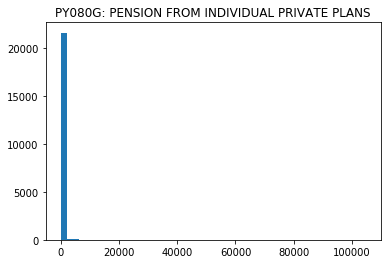

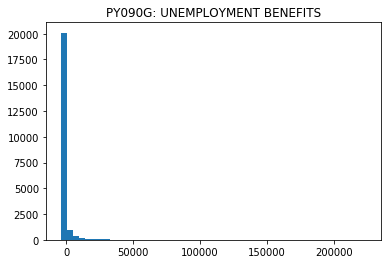

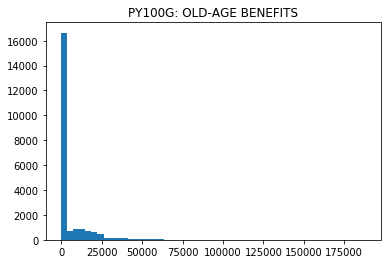

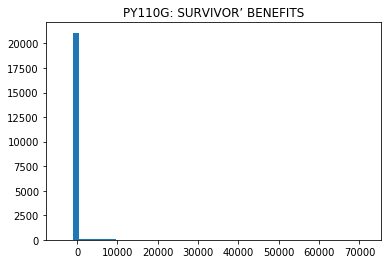

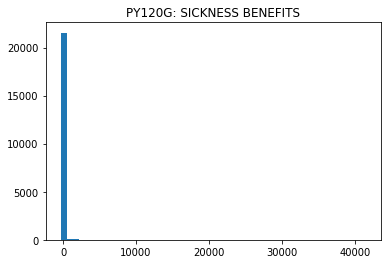

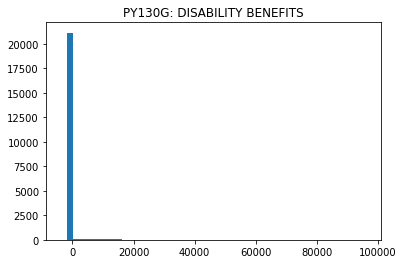

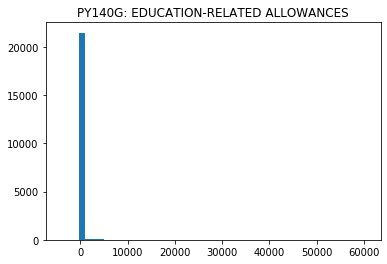

In [113]:
for x in range(len(job)):
    plt.hist(ppp[job[x]], bins = 50)
    plt.title(job[x])
    plt.show()
# conclusion: 0 for no, than the number  --> check if it could be a good  idea to change it to a boolean

In [116]:
for x in range(len(job)):
    print(job[x], ppp[job[x]].unique())
## all non booleans

PY010G: EMPLOYEE CASH OR NEAR CASH INCOME [37262.33     0.   23516.66 ... 30004.36 26734.94 21652.92]
PY020G: NON-CASH EMPLOYEE INCOME [    0   160   450  1080  4887   522  3722  3421   200   700    25 11558
  7032  7016 11564   527  8740    12  3150    50  7548    75  3564  9940
  8520   100  3847  1780  6835   300 10962  1600  1000    60   750  9300
  1830 14680   120   350  4726   250   849  3522  8700  9138  8044   528
  2000   935   432  6204  8220  8180   400  3449 16464  8860 10064 11260
  6070  1128 10467   900  8982   240    20   959  1112  1416   480   180
   208  6355   307  4964   420  4616   600   360  5263  9737   679  5157
   720   485   234  7401  4700  5954   616  9207   800  2412   215  4380
  6860  3890   516  6760    92   584  7260   312    83  6591   660  2288
   500  4652  7580  6300   473  9535   220    36   836  9786 12748  3919
  3612  5353  5184  4632  2175  7304 11192  7476  9357  7421 10092   331
  7773  6242 11520   275  6137 10295   227  2793  5129   430  

In [122]:
ppp[job].describe()

,PY010G: EMPLOYEE CASH OR NEAR CASH INCOME,PY020G: NON-CASH EMPLOYEE INCOME,PY021G: COMPANY CAR,PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS,PY050G: CASH BENEFITS OR LOSSES FROM SELF-EMPLOYMENT,PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS,PY090G: UNEMPLOYMENT BENEFITS,PY100G: OLD-AGE BENEFITS,PY110G: SURVIVOR’ BENEFITS,PY120G: SICKNESS BENEFITS,PY130G: DISABILITY BENEFITS,PY140G: EDUCATION-RELATED ALLOWANCES
count,21809.000000,21809.000000,21809.000000,21809.000000,21809.000000,21809.000000,21809.000000,21809.000000,21809.000000,21809.000000,21809.000000,21809.000000
mean,16018.567489,112.351002,67.514798,709.092301,1313.109169,85.883489,736.151532,4616.630356,285.063136,76.166204,341.339105,118.492753
std,24291.143001,901.280217,660.946475,1602.992490,10523.460984,1464.875862,4524.862313,10825.644500,2222.565891,1042.797375,2606.270912,1419.690758
min,-3662.860000,0.000000,-54.470000,0.000000,-40127.630000,0.000000,-3932.450000,-309.730000,-3981.770000,-292.460000,-3719.140000,-4140.010000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3655.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,27804.530000,0.000000,0.000000,876.000000,0.000000,0.000000,0.000000,1858.630000,0.000000,0.000000,0.000000,0.000000
max,597559.990000,19854.000000,27035.030000,75000.000000,496542.820000,104613.480000,223825.010000,188119.910000,71480.460000,41425.710000,95899.040000,60284.900000


In [ ]:
"""
Comment:
- strange negative values
- imbalanced datas (since 75%-quartile is often 0)

ideas: 
- check if it could be a good idea to generate booleans
- check if it could be a good idea to generate 1 column for "benefits"


"""

###### [0] PY010G: EMPLOYEE CASH OR NEAR CASH INCOME'

In [ ]:
"""
INCOME (Gross personal income, total and components at personal level)
Gross means that neither taxes nor social contributions have been deducted at source. 
0 no income
1 - 999999.99 income (national currency)  (Euro)

The employee income is broken down into: 
(1) Gross employee cash or near cash income (PY010G) : It refers to the monetary component of the compensation of employees in cash payable by an 
employer to an employee.
(2) Gross non-cash employee income (PY020G) It refers to the non-monetary income components which may be provided free or at reduced 
price to an employee as part of the employment package by an employer
(3) Employers’ social insurance contributions (PY030G) 
"""
## this is a very important feature

## check negatives
ppp[ppp[job[0]]<0].shape[0] ## --> 12 negative values; drop
ppp= ppp[ppp[job[0]]>=0]
ppp.shape[0]

69559.5
43


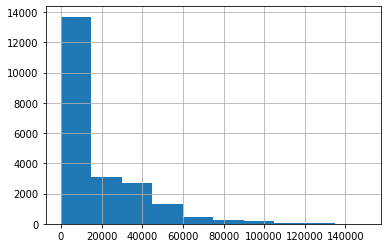

In [183]:
## check outliers
Q1 = ppp[job[0]].quantile(0.25)
Q3 = ppp[job[0]].quantile(0.75)
IQR = Q3 - Q1

print((Q3 + 1.5 * IQR))
#outlier = ppp[~(ppp[job[0]]> (Q3 + 1.5 * IQR))]
# ppp.shape[0]-outlier.shape[0]  --> too many outliers like that, and also, the limit of 70'000 Euros for declaring saleries as outliers is too small

### set limit for outliers at 150'000 Euro (based on my knowledge)
outlier = ppp[~(ppp[job[0]]> (150000))]
print(ppp.shape[0]-outlier.shape[0])

outlier[job[0]].hist()
ppp = outlier

##### [1] 'PY020G: NON-CASH EMPLOYEE INCOME

0

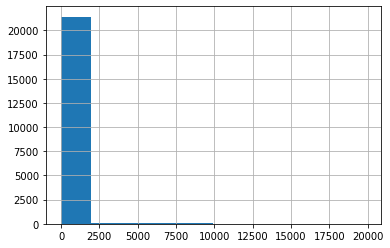

In [194]:
"""
1 - 999999.99 income (national currency) 
0 no income 

"""

ppp[job[1]].value_counts()
ppp[job[1]].hist()

## i add this to the previous feature income, because its part of income and most have 0...

ppp[job[0]] =ppp[job[0]] +ppp[job[1]]

### check, if i have generated new outliers or nans
outlier = ppp[(ppp[job[0]]> (150000))]
outlier.shape # --> no new outliers
ppp[job[0]].isna().sum() ### no new nans

In [212]:
## drop column PY020G: NON-CASH EMPLOYEE INCOME in ppp and rename PY010G
ppp.drop('PY020G: NON-CASH EMPLOYEE INCOME', axis=1, inplace = True)

ppp=ppp.rename(columns={'PY010G: EMPLOYEE CASH OR NEAR CASH INCOME':'PY010G_PY020G: EMPLOYEE INCOME'})

job= ['PY010G_PY020G: EMPLOYEE INCOME',
       '0', 'PY021G: COMPANY CAR',
       'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
       'PY050G: CASH BENEFITS OR LOSSES FROM SELF-EMPLOYMENT',
       'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
       'PY090G: UNEMPLOYMENT BENEFITS', 'PY100G: OLD-AGE BENEFITS',
       'PY110G: SURVIVOR’ BENEFITS', 'PY120G: SICKNESS BENEFITS',
       'PY130G: DISABILITY BENEFITS', 'PY140G: EDUCATION-RELATED ALLOWANCES']

###### [2] 'PY021G: COMPANY CAR'

In [ ]:
"""
1 - 999999.99 income (national currency)
0 no income 
INCOME (Gross personal income, total and components at personal level) 
part of Income --> add to job[0]
"""
## i add this to the previous feature income, because its part of income and most have 0...
ppp[job[0]] =ppp[job[0]] +ppp[job[2]]
ppp.drop(job[2], axis=1, inplace = True)

In [292]:
ppp=ppp.rename(columns={'PY010G_PY020G: EMPLOYEE INCOME':'PY010G_PY020G_PY021G: EMPLOYEE INCOME'})
job= ['PY010G_PY020G_PY021G: EMPLOYEE INCOME',
       '0', '0',
       'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
       'PY050G: CASH BENEFITS OR LOSSES FROM SELF-EMPLOYMENT',
       'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
       'PY090G: UNEMPLOYMENT BENEFITS', 'PY100G: OLD-AGE BENEFITS',
       'PY110G: SURVIVOR’ BENEFITS', 'PY120G: SICKNESS BENEFITS',
       'PY130G: DISABILITY BENEFITS', 'PY140G: EDUCATION-RELATED ALLOWANCES']

###### [3] 'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS'

In [241]:
"""
Contributions made, during the income reference period, to individual private pension plans 
refers to the pensions policies taken out by individual households on their own initiative and 
for their own benefit, independently of their employers or government and outside any social 
insurance scheme. 
1 - 999999.99 amount (national currency) 
0 no contribution 
"""

ppp[ppp[job[3]]==0].shape[0]/ppp.shape[0]

# remark: regarding the content, i think this is not a very important variable. However, no misssings, no imbalancing --> keep it s

0.5062057552633998

###### [4]  'PY050G: CASH BENEFITS OR LOSSES FROM SELF-EMPLOYMENT'

In [ ]:
"""
Self-employment income is defined as the income received, during the income reference 
period, by individuals, for themselves or in respect of their family members, as a result of 
their current or former involvement in self-employment jobs. 

1 - 999999.99 benefits 
-999999.99 - -1 losses 
0 no income
"""
## i add this to the previous feature income, because it doesnt matter if the income is from self- employed or job; this divergence i
ppp[job[0]] =ppp[job[0]] +ppp[job[4]]
ppp.drop(job[4], axis=1, inplace = True)



In [296]:
ppp=ppp.rename(columns={'PY010G_PY020G_PY021G: EMPLOYEE INCOME':'PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME'})
job= ['PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
       '0', '0',
       'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
       '0',
       'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
       'PY090G: UNEMPLOYMENT BENEFITS', 'PY100G: OLD-AGE BENEFITS',
       'PY110G: SURVIVOR’ BENEFITS', 'PY120G: SICKNESS BENEFITS',
       'PY130G: DISABILITY BENEFITS', 'PY140G: EDUCATION-RELATED ALLOWANCES']

###### [5]  ''PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS'

PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS


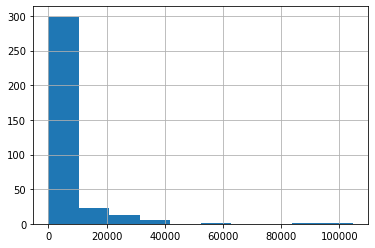

In [279]:
""" 
[5]  ''PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS'
Regular pensions from private plans (other than those covered under ESSPROS) refer to 
pensions and annuities received, during the income reference period, in the form of interest or 
dividend income from individual private insurance plans, i.e. fully organised schemes where 
contributions are at the discretion of the contributor independently of their employers or 
government.
"""
print(job[5])
#ppp[job[5]].hist()

ppp[ppp[job[5]]>0][job[5]].hist()

### keep all, even we have outliers --> scaling befor ml

In [ ]:
###### [6:10] 'Social benefits in euro'
"""
Social benefits1 are defined as current transfers received during the income reference period2 
by households intended to relieve them from the financial burden of a number of risk or 
needs, made through collectively organised schemes, or outside such schemes by government 
units and NPISHs.
"""
 

In [257]:
ppp[job[6:12]].describe()
# negative values outliers?

,PY090G: UNEMPLOYMENT BENEFITS,PY100G: OLD-AGE BENEFITS,PY110G: SURVIVOR’ BENEFITS,PY120G: SICKNESS BENEFITS,PY130G: DISABILITY BENEFITS,PY140G: EDUCATION-RELATED ALLOWANCES
count,21754.000000,21754.000000,21754.000000,21754.000000,21754.000000,21754.000000
mean,738.174071,4628.316685,285.783853,76.372217,342.517266,118.792335
std,4530.369112,10836.822939,2225.327591,1044.104932,2609.295781,1421.471870
min,-3932.450000,0.000000,-3981.770000,0.000000,0.000000,-4140.010000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1918.395000,0.000000,0.000000,0.000000,0.000000
max,223825.010000,188119.910000,71480.460000,41425.710000,95899.040000,60284.900000


In [284]:
for x in range(6,12):
    print(job[x], ppp[ppp[job[x]]<0].shape[0])
#only a few negative values ---> keep only 0 and higher
for x in range(6,12):
    ppp= ppp[ppp[job[x]]>=0]
    print(ppp.shape[0])

PY090G: UNEMPLOYMENT BENEFITS 1
PY100G: OLD-AGE BENEFITS 0
PY110G: SURVIVOR’ BENEFITS 1
PY120G: SICKNESS BENEFITS 0
PY130G: DISABILITY BENEFITS 0
PY140G: EDUCATION-RELATED ALLOWANCES 1
21753
21753
21752
21752
21752
21751


In [287]:
ppp["PY090G++: SOCIAL BENEFITS"] = ppp[job[6]]+ppp[job[7]]+ppp[job[8]]+ppp[job[9]]+ppp[job[10]]+ppp[job[11]]

### conclusion

In [297]:
job= ['PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
       'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
      'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
      "PY090G++: SOCIAL BENEFITS",
       'PY090G: UNEMPLOYMENT BENEFITS', 'PY100G: OLD-AGE BENEFITS',
       'PY110G: SURVIVOR’ BENEFITS', 'PY120G: SICKNESS BENEFITS',
       'PY130G: DISABILITY BENEFITS', 'PY140G: EDUCATION-RELATED ALLOWANCES']

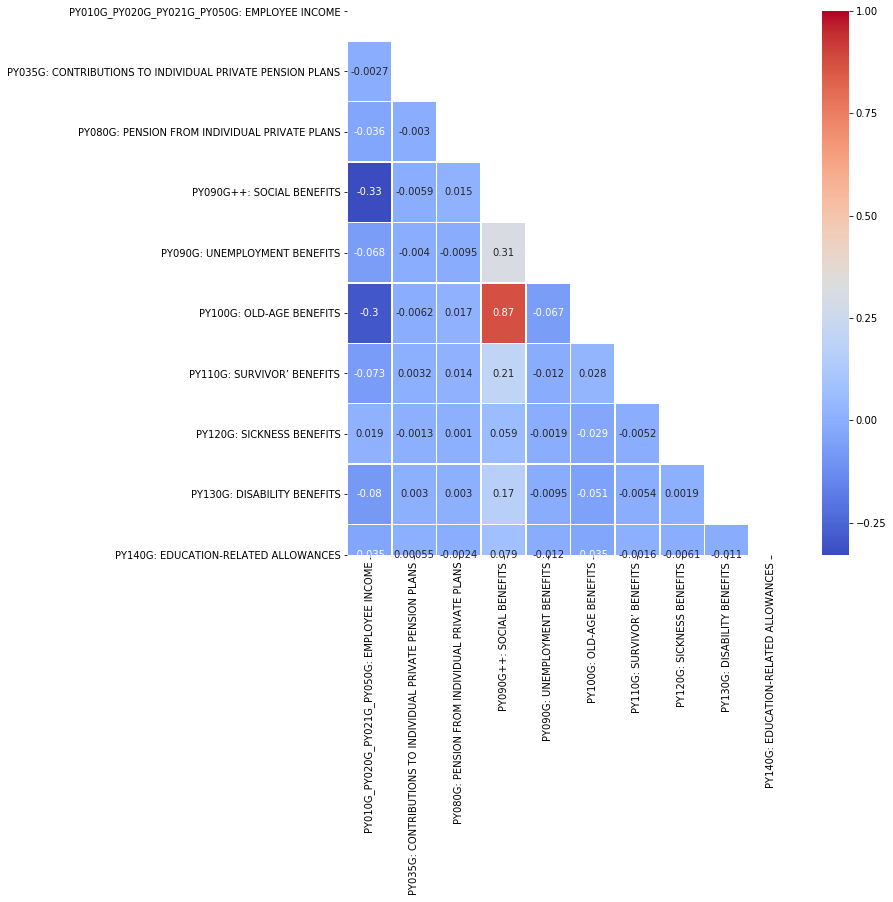

In [301]:
subjob =ppp[job]

plt.figure(figsize =(10,10))
corr = subjob.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, cmap='coolwarm', annot = True, linewidth=0.5, mask=mask)


## hight correlation between old age benefit and social benefit ... but i want the feature "social benefits" has the idea to replace all the other individual features 

In [308]:
job 

['PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
 'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
 'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
 'PY090G++: SOCIAL BENEFITS',
 'PY090G: UNEMPLOYMENT BENEFITS',
 'PY100G: OLD-AGE BENEFITS',
 'PY110G: SURVIVOR’ BENEFITS',
 'PY120G: SICKNESS BENEFITS',
 'PY130G: DISABILITY BENEFITS',
 'PY140G: EDUCATION-RELATED ALLOWANCES']

## 2.6 Satisfaction (PW) - Columns

In [111]:
### satisification 
sat =['PW010: OVERALL LIFE SATISFACTION', 'PW020: MEANING OF LIFE',
       'PW030: SATISFACTION WITH FINANCIAL SITUATION',
       'PW040: SATISFACTION WITH ACCOMMODATION', 'PW050: BEING VERY NERVOUS',
       'PW060: FEELING DOWN IN THE DUMPS', 'PW070: FEELING CALM AND PEACEFUL',
       'PW080: FEELING DOWNHEARTED OR DEPRESSED', 'PW090: BEING HAPPY',
       'PW120: SATISFACTION WITH TIME USE',
       'PW130: TRUST IN THE POLITICAL SYSTEM',
       'PW140: TRUST IN THE LEGAL SYSTEM', 'PW150: TRUST IN THE POLICE',
       'PW160: SATISFACTION WITH PERSONAL RELATIONSHIPS',
       'PW170: PERSONAL MATTERS (ANYONE TO DISCUSS WITH)',
       'PW180: HELP FROM OTHERS', 'PW190: TRUST IN OTHERS',
       'PW200: SATISFACTION WITH RECREATIONAL OR GREEN AREAS',
       'PW210: SATISFACTION WITH LIVING ENVIRONMENT',
       'PW220: PHYSICAL SECURITY']

ppp[sat].isna().sum()

PW010: OVERALL LIFE SATISFACTION                        3403
PW020: MEANING OF LIFE                                  3498
PW030: SATISFACTION WITH FINANCIAL SITUATION            3471
PW040: SATISFACTION WITH ACCOMMODATION                  3377
PW050: BEING VERY NERVOUS                               3495
PW060: FEELING DOWN IN THE DUMPS                        3536
PW070: FEELING CALM AND PEACEFUL                        3510
PW080: FEELING DOWNHEARTED OR DEPRESSED                 3444
PW090: BEING HAPPY                                      3501
PW120: SATISFACTION WITH TIME USE                       3596
PW130: TRUST IN THE POLITICAL SYSTEM                    3374
PW140: TRUST IN THE LEGAL SYSTEM                        3396
PW150: TRUST IN THE POLICE                              3488
PW160: SATISFACTION WITH PERSONAL RELATIONSHIPS         3536
PW170: PERSONAL MATTERS (ANYONE TO DISCUSS WITH)        3299
PW180: HELP FROM OTHERS                                 3347
PW190: TRUST IN OTHERS  

In [ ]:
### this variable i use for outcome variables 
## thats why i only focus on the one i am interested most

### this are:



###### [0] OVERALL LIFE SATISFACTION

In [310]:
"""
Life satisfaction represents a report of how a respondent evaluates or appraises his or her life 
taken as a whole. It is intended to represent a broad, reflective appraisal the person makes of 
his or her life. The term life is intended here as all areas of a person’s life at a particular point 
in time (these days)1.
0-10 From 0 (Not at all satisfied) to 10 (Completely satisfied) 
99 Do not know

"""

ppp[sat[0]].describe()
ppp[sat[0]].value_counts()

8.0     5749
7.0     3072
9.0     2715
5.0     1879
10.0    1746
6.0     1397
4.0      515
3.0      498
99.0     279
2.0      259
0.0      138
1.0      105
Name: PW010: OVERALL LIFE SATISFACTION, dtype: int64

###### [1] PW020: MEANING OF LIFE

In [311]:
"""
The respondent should be invited to think about what makes his/her life and existence feel 
important and meaningful and then answer to the question. The term "worthwhile" denotes 
meaning of purpose/beneficial. It is not related to any specific area of life, focuses rather on 
life in general. 
0-10 From 0 (Not worthwhile at all) to 10 (Completely worthwhile) 
99 Do not know
"""
sat[1]

'PW020: MEANING OF LIFE'

###### [2:10 ] satisfication with material stuff, beeing nervous, etc

In [323]:
sat[2:10]

['PW030: SATISFACTION WITH FINANCIAL SITUATION',
 'PW040: SATISFACTION WITH ACCOMMODATION',
 'PW050: BEING VERY NERVOUS',
 'PW060: FEELING DOWN IN THE DUMPS',
 'PW070: FEELING CALM AND PEACEFUL',
 'PW080: FEELING DOWNHEARTED OR DEPRESSED',
 'PW090: BEING HAPPY',
 'PW120: SATISFACTION WITH TIME USE']

###### [10] 'TRUST IN THE POLITICAL SYSTEM'

In [322]:
sat[10]

'PW130: TRUST IN THE POLITICAL SYSTEM'

In [ ]:
"""
The term 'political system' refers to a complete set of institutions, interest groups (such as 
political parties, trade unions), the relationships between those institutions and the political 
norms and rules that govern their functions. 

0-10 From 0 (No trust at all) to 10 (Complete trust) 
99 Do not know
"""

###### [11] 'PW140: TRUST IN THE LEGAL SYSTEM'

In [324]:
sat[11]

'PW140: TRUST IN THE LEGAL SYSTEM'

In [ ]:
"""
The term 'legal system' refers to the entire system for interpreting and enforcing the laws and 
not to a specific legal entity within the country. Trust in the legal system is supposed to 
measure, for example, opinions and attitudes towards the effectiveness and efficiency of the 
institutions such as the courts, the fairness of its procedures and decisions, and the extent to 
which the sentences given out reflect the values and desires of citizens.s
0-10 From 0 (No trust at all) to 10 (Complete trust) 
99 Do not know 
"""





###### [12: ] other interesting features, but not possible to focus on them..

## 2.7 Basic Needs  (PD) - columns

In [329]:
"""
Basic Needs
1 Yes  
2 No - cannot afford it  
3 No - other reason  
"""

'\nBasic Needs\n1 Yes  \n2 No - cannot afford it  \n3 No - other reason  \n'

In [337]:
## Basic Needs  
bneeds= ['PD020: Replace worn-out clothes by some new (not second-hand) ones',
       'PD030: Two pairs of properly fitting shoes',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD070: Spend a small amount of money each week on yourself',
       'PD080: Internet connection for personal use at home']
ppp[bneeds].isna().sum()

PD020: Replace worn-out clothes by some new (not second-hand) ones                            190
PD030: Two pairs of properly fitting shoes                                                    178
PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month    194
PD060: Regularly participate in a leisure activity                                            151
PD070: Spend a small amount of money each week on yourself                                    204
PD080: Internet connection for personal use at home                                           192
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C5408DE48>,
      dtype=object)

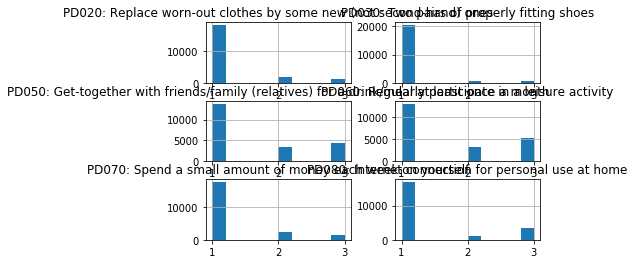

In [328]:
ppp[bneeds].hist()

In [361]:
for x in range(0, len(bneeds)): 
    null_displ = ppp[ppp[bneeds[x]].isna()==False]
    print(null_displ[bneeds].isna().sum())
## --> different nan, so deleting nan is not a good idea

# either i fill na or i drop columns

PD020: Replace worn-out clothes by some new (not second-hand) ones                              0
PD030: Two pairs of properly fitting shoes                                                    177
PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month    193
PD060: Regularly participate in a leisure activity                                            150
PD070: Spend a small amount of money each week on yourself                                    204
PD080: Internet connection for personal use at home                                           192
dtype: int64
PD020: Replace worn-out clothes by some new (not second-hand) ones                            189
PD030: Two pairs of properly fitting shoes                                                      0
PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month    194
PD060: Regularly participate in a leisure activity                                            149
PD070: 

PB010: YEAR OF THE SURVEY

PB020: COUNTRY  

PB030: PERSONAL ID

#### to delete:
PB040: PERSONAL CROSS-SECTIONAL WEIGHT

PB050: PERSONAL BASE WEIGHT

PB060: PERSONAL CROSS-SECTIONAL WEIGHT FOR SELECTED RESPONDENT 

PB070: PERSONAL DESIGN WEIGHT FOR SELECTED RESPONDENT

PB080: PERSONAL BASE WEIGHT FOR SELECTED RESPONDENT

PB090: DAY OF THE PERSONAL INTERVIEW  

PB100: MONTH OF THE PERSONAL INTERVIEW 

PB110: YEAR OF THE PERSONAL INTERVIEW 

PB120: MINUTES TO COMPLETE THE PERSONAL QUESTIONNAIRE  

### keep
PB130: MONTH OF BIRTH 

PB140: YEAR OF BIRTH  


PB150: SEX 


### drop
PB160: FATHER ID 

PB170: MOTHER ID

PB180: SPOUSE/PARTNER ID

#### keep
PB190: MARITAL STATUS

### dont kno
PB200: CONSENSUAL UNION

## keeep (maybe)
PB210: COUNTRY OF BIRTH  

PB220A: CITIZENSHIP 1

PB220B: CITIZENSHIP 2

#### check
PE010: CURRENT EDUCATION ACTIVITY

PE020: ISCED LEVEL CURRENTLY ATTENDED

### keep aber modify
PE030: YEAR WHEN HIGHEST LEVEL OF EDUCATION WAS ATTAINED


PE040: HIGHEST ISCED LEVEL ATTAINED

### keep if good?
PH010: GENERAL HEALTH


PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION 

PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS

PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT 

### drop
PH050: MAIN REASON FOR UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT 

### keep
PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT

### drop
PH070: MAIN REASON FOR UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT

### keep
PL015: PERSON HAS EVER WORKED

PL020: ACTIVELY LOOKING FOR A JOB

PL025: AVAILABLE FOR WORK

PL031: SELF-DEFINED CURRENT ECONOMIC STATUS

PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK

PL040: STATUS IN EMPLOYMENT


PL051: OCCUPATION (ISCO-08 (COM))

PL060: NUMBER OF HOURS USUALLY WORKED PER WEEK IN MAIN JOB

PL073: NUMBER OF MONTHS SPENT AT FULL-TIME WORK AS EMPLOYEE

PL074: NUMBER OF MONTHS SPENT AT PART-TIME WORK AS EMPLOYEE

PL075: NUMBER OF MONTHS SPENT AT FULL-TIME WORK AS SELF-EMPLOYED (INCLUDING 
FAMILY WORKER)

PL076: NUMBER OF MONTHS SPENT AT PART-TIME WORK AS SELF-EMPLOYED (INCLUDING 
FAMILY WORKER)

PL080: NUMBER OF MONTHS SPENT IN UNEMPLOYMENT

PL085: NUMBER OF MONTHS SPENT IN RETIREMENT OR EARLY RETIREMENT

PL086: NUMBER OF MONTHS SPENT AS DISABLED OR/AND UNFIT TO WORK

PL087: NUMBER OF MONTHS SPENT STUDYING

PL088: NUMBER OF MONTHS SPENT IN COMPULSORY MILITARY SERVICE

PL089: NUMBER OF MONTHS SPENT FULFILLING DOMESTIC TASKS AND CARE RESPONSIBILITIES

PL090: NUMBER OF MONTHS SPENT IN OTHER INACTIVITY

PL100: TOTAL NUMBER OF HOURS USUALLY WORKED IN SECOND, THIRD… JOBS

### drop
PL111: NACE REV.2 . 292 

PL120: REASON FOR WORKING LESS THAN 30 HOURS .. 293 

### keep
PL130: NUMBER OF PERSONS WORKING AT THE LOCAL UNIT . 294

PL140: TYPE OF CONTRACT .. 295 

PL150: MANAGERIAL POSITION . 297 

PL160: CHANGE OF JOB SINCE LAST YEAR .. 298 

PL170: REASON FOR CHANGE .. 299 

PL180: MOST RECENT CHANGE IN THE INDIVIDUAL’S ACTIVITY STATUS . 301 

PL190: WHEN BEGAN FIRST REGULAR JOB . 302 

PL200: NUMBER OF YEARS SPENT IN PAID WORK  303 


#### drop
PL211A: MAIN ACTIVITY ON JANUARY . 304

PL211B: MAIN ACTIVITY ON FEBRUARY .. 304 

PL211C: MAIN ACTIVITY ON MARCH . 304 

PL211D: MAIN ACTIVITY ON APRIL . 304 

PL211E: MAIN ACTIVITY ON MAY  304 

PL211F: MAIN ACTIVITY ON JUNE  304 

PL211G: MAIN ACTIVITY ON JULY .. 304 

PL211H: MAIN ACTIVITY ON AUGUST  304 

PL211I: MAIN ACTIVITY ON SEPTEMBER . 304 

PL211J: MAIN ACTIVITY ON OCTOBER . 304 

PL211K: MAIN ACTIVITY ON NOVEMBER  304 

PL211L: MAIN ACTIVITY ON DECEMBER . 304 

## check
PY010G/PY010N: EMPLOYEE CASH OR NEAR CASH INCOME .. 306 

PY020G/PY020N: NON-CASH EMPLOYEE INCOME  308 

PY021G/PY021N: COMPANY CAR . 310 

## drop
PY030G: EMPLOYER'S SOCIAL INSURANCE CONTRIBUTION . 311 
PY031G: OPTIONAL EMPLOYER'S SOCIAL INSURANCE CONTRIBUTIONS .. 311 
PY035G/PY035N: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS . 313 
PY050G/PY050N: CASH BENEFITS OR LOSSES FROM SELF-EMPLOYMENT . 315 
PY080G/PY080N: PENSION FROM INDIVIDUAL PRIVATE PLANS  320

### <font color='red'>if availabe: alternative for outcome.</font>
PY090G/PY090N: UNEMPLOYMENT BENEFITS . 322 

PY100G/PY100N: OLD-AGE BENEFITS .. 322 

PY110G/PY110N: SURVIVOR’ BENEFITS .. 322 

PY120G/PY120N: SICKNESS BENEFITS.. 322 

PY130G/PY130N: DISABILITY BENEFITS . 322 

PY140G/PY140N: EDUCATION-RELATED ALLOWANCES  322 

### keep
PY200G: GROSS MONTHLY EARNINGS FOR EMPLOYEES . 330 




### keep (outcome?)
PW010: OVERALL LIFE SATISFACTION . - 362 - 

PW020: MEANING OF LIFE  - 363 - 

PW030: SATISFACTION WITH FINANCIAL SITUATION .. - 364 - 

PW040: SATISFACTION WITH ACCOMMODATION .. - 365 -

PW050: BEING VERY NERVOUS . - 366 - 

PW060: FEELING DOWN IN THE DUMPS  - 367 - 

PW070: FEELING CALM AND PEACEFUL .. - 368 - 

PW080: FEELING DOWNHEARTED OR DEPRESSED . - 369 - 

PW090: BEING HAPPY . - 370 - 

<font color='red'>PW100: JOB SATISFACTION . - 371 -</font> 

PW110: SATISFACTION WITH COMMUTING TIME .. - 372 - 

PW120: SATISFACTION WITH TIME USE  - 373 - 

<font color='red'>PW130: TRUST IN THE POLITICAL SYSTEM  - 374 -</font>

PW140: TRUST IN THE LEGAL SYSTEM . - 375 - 

PW150: TRUST IN THE POLICE .. - 376 - 

PW160: SATISFACTION WITH PERSONAL RELATIONSHIPS  - 377 - 

PW170: PERSONAL MATTERS (ANYONE TO DISCUSS WITH) . - 378 - 

PW180: HELP FROM OTHERS .. - 379 - 

PW190: TRUST IN OTHERS  - 380 - 

PW200: SATISFACTION WITH RECREATIONAL OR GREEN AREAS . - 381 -

PW210: SATISFACTION WITH LIVING ENVIRONMENT .. - 382 - 

PW220: PHYSICAL SECURITY .. 383


### backup

In [23]:
len(data.columns)

47

In [63]:
data = pd.read_csv("./data//BE_2013p_EUSILC.csv")
data.shape

(11572, 94)

In [58]:
data=data.dropna(thresh=len(data) - 2000, axis=1)


In [59]:
data.shape

(11572, 70)

In [64]:
## overall life satisfaction
data=data[data['PW010']<=10]

In [65]:
data.shape

(9727, 94)

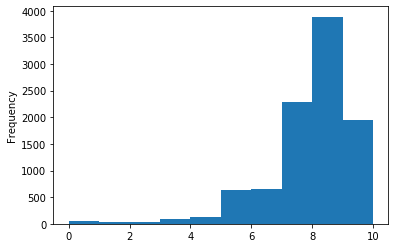

In [66]:
data['PW010'].plot.hist()

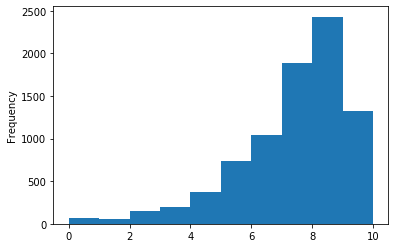

In [68]:
# satisfaction with financial situation
data=data[data['PW030']<=10]
data['PW030'].plot.hist()

In [69]:
data.columns

Index(['PB010', 'PB020', 'PB030', 'PB040', 'PB060', 'PB100', 'PB110', 'PB120',
       'PB130', 'PB140', 'PB150', 'PB190', 'PB200', 'PB220A', 'PE010', 'PE020',
       'PE040', 'PL031', 'PL035', 'PL015', 'PL020', 'PL025', 'PL040', 'PL051',
       'PL060', 'PL100', 'PL111', 'PL120', 'PL130', 'PL140', 'PL150', 'PL160',
       'PL170', 'PL180', 'PL190', 'PH010', 'PH020', 'PH030', 'PH040', 'PH050',
       'PH060', 'PH070', 'PY020N', 'PY035N', 'PY010G', 'PY020G', 'PY021G',
       'PY030G', 'PY031G', 'PY035G', 'PY050G', 'PY080G', 'PY090G', 'PY100G',
       'PY110G', 'PY120G', 'PY130G', 'PY140G', 'PY200G', 'PD020', 'PD030',
       'PD050', 'PD060', 'PD070', 'PD080', 'PD090', 'PW010', 'PW020', 'PW030',
       'PW040', 'PW050', 'PW060', 'PW070', 'PW080', 'PW090', 'PW100', 'PW110',
       'PW120', 'PW130', 'PW140', 'PW150', 'PW160', 'PW170', 'PW180', 'PW190',
       'PW200', 'PW210', 'PW220', 'PX010', 'PX020', 'PX030', 'PX040', 'PX050',
       'PX200'],
      dtype='object')

In [71]:
data['PY110G'].describe()

count     8261.000000
mean       155.576201
std       2189.328181
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      78088.000000
Name: PY110G, dtype: float64

In [4]:
data2 = pd.read_csv("./data/BE_2012p_EUSILC.csv")
data2.shape

(10874, 66)

In [7]:
colum2012=list(data2.columns)

In [9]:
colum2013=['PB010', 'PB020', 'PB030', 'PB040', 'PB060', 'PB100', 'PB110', 'PB120',
       'PB130', 'PB140', 'PB150', 'PB190', 'PB200', 'PB220A', 'PE010', 'PE020',
       'PE040', 'PL031', 'PL035', 'PL015', 'PL020', 'PL025', 'PL040', 'PL051',
       'PL060', 'PL100', 'PL111', 'PL120', 'PL130', 'PL140', 'PL150', 'PL160',
       'PL170', 'PL180', 'PL190', 'PH010', 'PH020', 'PH030', 'PH040', 'PH050',
       'PH060', 'PH070', 'PY020N', 'PY035N', 'PY010G', 'PY020G', 'PY021G',
       'PY030G', 'PY031G', 'PY035G', 'PY050G', 'PY080G', 'PY090G', 'PY100G',
       'PY110G', 'PY120G', 'PY130G', 'PY140G', 'PY200G', 'PD020', 'PD030',
       'PD050', 'PD060', 'PD070', 'PD080', 'PD090', 'PW010', 'PW020', 'PW030',
       'PW040', 'PW050', 'PW060', 'PW070', 'PW080', 'PW090', 'PW100', 'PW110',
       'PW120', 'PW130', 'PW140', 'PW150', 'PW160', 'PW170', 'PW180', 'PW190',
       'PW200', 'PW210', 'PW220', 'PX010', 'PX020', 'PX030', 'PX040', 'PX050',
       'PX200']

In [16]:
common= [value for value in colum2012 if value in colum2013]
common

['PB010',
 'PB020',
 'PB030',
 'PB040',
 'PB060',
 'PB100',
 'PB110',
 'PB120',
 'PB130',
 'PB140',
 'PB150',
 'PB190',
 'PB200',
 'PB220A',
 'PE010',
 'PE020',
 'PE040',
 'PL031',
 'PL035',
 'PL015',
 'PL020',
 'PL025',
 'PL040',
 'PL051',
 'PL060',
 'PL100',
 'PL111',
 'PL120',
 'PL130',
 'PL140',
 'PL150',
 'PL160',
 'PL170',
 'PL180',
 'PL190',
 'PH010',
 'PH020',
 'PH030',
 'PH040',
 'PH050',
 'PH060',
 'PH070',
 'PY020N',
 'PY035N',
 'PY010G',
 'PY020G',
 'PY021G',
 'PY030G',
 'PY031G',
 'PY035G',
 'PY050G',
 'PY080G',
 'PY090G',
 'PY100G',
 'PY110G',
 'PY120G',
 'PY130G',
 'PY140G',
 'PY200G',
 'PX010',
 'PX020',
 'PX030',
 'PX040',
 'PX050']

### Germany Start of Data Cleaning

In [50]:
data3 = pd.read_csv("./data/DE_2013p_EUSILC.csv")
data3.shape

(22042, 284)

In [51]:
columDE2013 = data3.columns

In [23]:
common= [value for value in columDE2013 if value in colum2013]
#data3 = data3[common]

In [52]:
data3['PY110G'].isna().sum()

0

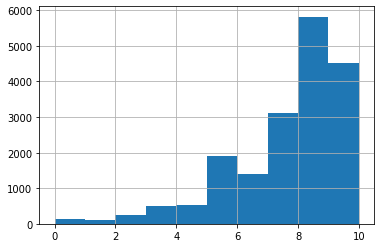

In [34]:
data3.PW010[data3['PW010']<=10].hist()

In [53]:
data3.PW010[data3['PW010']<=10].count()

18309

In [54]:
data3.describe()

,PB010,PB030,PB040,PB040_F,PB060,PB060_F,PB100,PB100_F,PB110,PB110_F,...,PW210,PW210_F,PW220,PW220_F,PX010,PX020,PX030,PX040,PX050,PX200
count,22042.0,2.204200e+04,22042.000000,0.0,0.0,0.0,22042.000000,0.0,22042.0,0.0,...,18565.000000,0.0,18593.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2013.0,2.060714e+08,3145.641398,NaN,NaN,NaN,2.436394,NaN,2013.0,NaN,...,8.619930,NaN,2.206260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,1.136807e+08,735.421261,NaN,NaN,NaN,0.495949,NaN,0.0,NaN,...,9.456481,NaN,1.150235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2013.0,3.560100e+04,1672.780749,NaN,NaN,NaN,2.000000,NaN,2013.0,NaN,...,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2013.0,1.097705e+08,2848.534031,NaN,NaN,NaN,2.000000,NaN,2013.0,NaN,...,7.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2013.0,2.095570e+08,3057.583187,NaN,NaN,NaN,2.000000,NaN,2013.0,NaN,...,8.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2013.0,2.985014e+08,3349.465812,NaN,NaN,NaN,3.000000,NaN,2013.0,NaN,...,9.000000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2013.0,4.011008e+08,6445.686901,NaN,NaN,NaN,3.000000,NaN,2013.0,NaN,...,99.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
ds = data3.dropna(thresh=len(data3)*0.1, axis=1)
len(ds.columns)

74

In [56]:
ds.columns

Index(['PB010', 'PB020', 'PB030', 'PB040', 'PB100', 'PB110', 'PB120', 'PB140',
       'PB150', 'PB190', 'PB200', 'PB220A', 'PE010', 'PE020', 'PE040', 'PL031',
       'PL035', 'PL015', 'PL020', 'PL040', 'PL051', 'PL060', 'PL111', 'PL120',
       'PL130', 'PL140', 'PL150', 'PL160', 'PL190', 'PH010', 'PH020', 'PH030',
       'PH040', 'PH060', 'PY010G', 'PY020G', 'PY021G', 'PY035G', 'PY050G',
       'PY080G', 'PY090G', 'PY100G', 'PY110G', 'PY120G', 'PY130G', 'PY140G',
       'PD020', 'PD030', 'PD050', 'PD060', 'PD070', 'PD080', 'PW010', 'PW020',
       'PW030', 'PW040', 'PW050', 'PW060', 'PW070', 'PW080', 'PW090', 'PW100',
       'PW110', 'PW120', 'PW130', 'PW140', 'PW150', 'PW160', 'PW170', 'PW180',
       'PW190', 'PW200', 'PW210', 'PW220'],
      dtype='object')

In [58]:
ds.describe()

,PB010,PB030,PB040,PB100,PB110,PB120,PB140,PB150,PB190,PB200,...,PW130,PW140,PW150,PW160,PW170,PW180,PW190,PW200,PW210,PW220
count,22042.0,2.204200e+04,22042.000000,22042.000000,22042.0,22042.000000,22042.000000,22042.000000,21883.000000,22042.000000,...,18626.000000,18611.000000,18519.000000,18468.000000,18701.000000,18664.000000,18619.000000,18578.000000,18565.000000,18593.000000
mean,2013.0,2.060714e+08,3145.641398,2.436394,2013.0,34.653298,1963.266401,1.509845,2.155006,1.884765,...,8.972619,9.004460,9.484151,8.974930,1.326453,1.261627,7.837961,9.460652,8.619930,2.206260
std,0.0,1.136807e+08,735.421261,0.495949,0.0,18.191672,18.109522,0.499914,1.204184,0.956788,...,19.267931,18.429625,16.882866,10.427592,1.436871,1.317381,14.819047,13.197976,9.456481,1.150235
min,2013.0,3.560100e+04,1672.780749,2.000000,2013.0,10.000000,1932.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2013.0,1.097705e+08,2848.534031,2.000000,2013.0,20.000000,1949.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,5.000000,7.000000,1.000000,1.000000,4.000000,7.000000,7.000000,2.000000
50%,2013.0,2.095570e+08,3057.583187,2.000000,2013.0,30.000000,1963.000000,2.000000,2.000000,1.000000,...,5.000000,6.000000,7.000000,8.000000,1.000000,1.000000,6.000000,8.000000,8.000000,2.000000
75%,2013.0,2.985014e+08,3349.465812,3.000000,2013.0,45.000000,1978.000000,2.000000,2.000000,3.000000,...,7.000000,8.000000,8.000000,9.000000,1.000000,1.000000,7.000000,9.000000,9.000000,3.000000
max,2013.0,4.011008e+08,6445.686901,3.000000,2013.0,90.000000,1996.000000,2.000000,5.000000,3.000000,...,99.000000,99.000000,99.000000,99.000000,9.000000,9.000000,99.000000,99.000000,99.000000,9.000000
